In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [64]:
df=pd.read_csv('avocado.csv')
print(df)

      Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0              0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1              1  20-12-2015          1.35      54876.98    674.28   44638.81   
2              2  13-12-2015          0.93     118220.22    794.70  109149.67   
3              3    06/12/15          1.08      78992.15   1132.00   71976.41   
4              4  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512          10  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513          11    09/10/16          1.51     178235.75  43325.87   52189.61   
1514          12    02/10/16          1.48     178410.82  46364.75   52893.38   
1515          13  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516          14  18-09-2016          1.43     182978.30  43116.41   54193.42   

          4770  Total Bags 

In [65]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [66]:
#df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#Checking the columns
df.shape

(1517, 16)

In [21]:
#checking the various columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Month', 'Day'],
      dtype='object')

In [8]:
#checking the data types of the columns
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [9]:
#Cheking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   int64         
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   int64         
 13  region        1517 non-null   object        
 14  Month         1517 non-null   int64         
 15  Day           1517 non-null   int64   

In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [11]:
#Checking for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

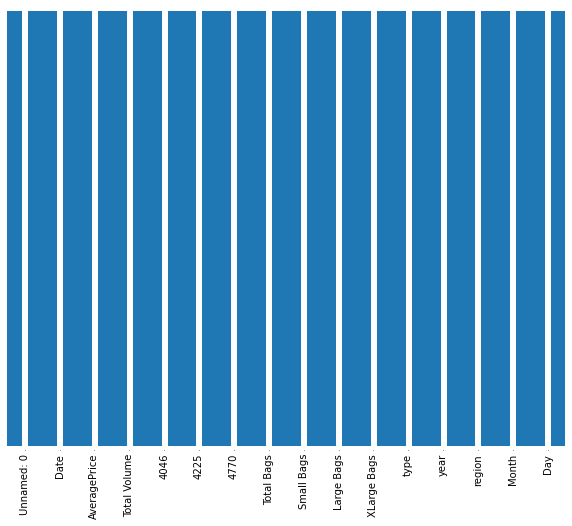

In [12]:
#Seeing the null value with the help of heatmap
plt.figure(figsize=(10,8))
sn.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='tab10',annot=True)
plt.show()

In [13]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [14]:
#To check the correlation
df=df.corr()
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854,-0.598729,-0.261166
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315


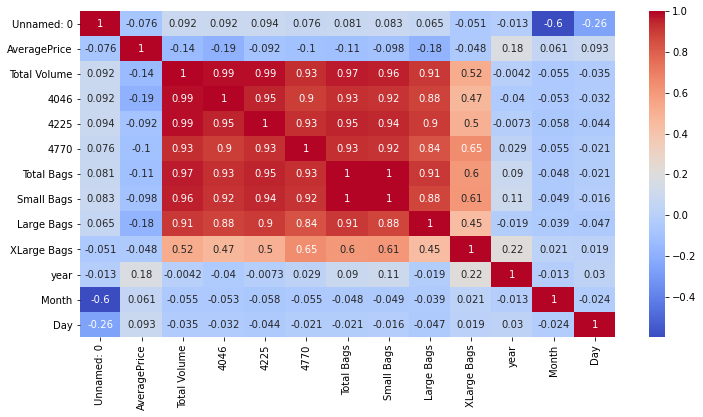

In [15]:
plt.figure(figsize=(12,6))
sn.heatmap(df,annot=True,cmap='coolwarm')
plt.show()

# VISUALIZATION

UNIVARIATE ANALYSIS

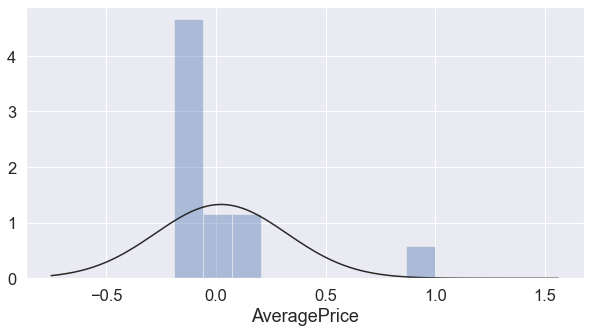

In [16]:
sn.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 5))
sn.distplot(a=df.AveragePrice, kde=False, fit=norm)
plt.show()

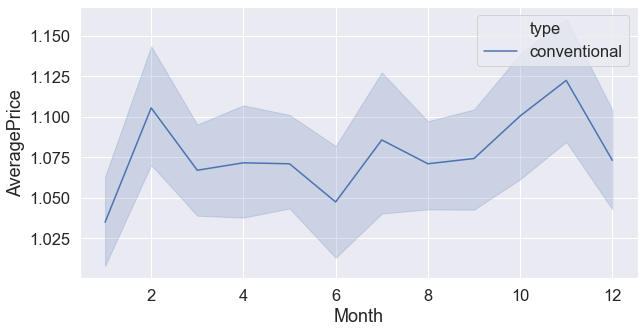

In [22]:
plt.figure(figsize=(10,5))
sn.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

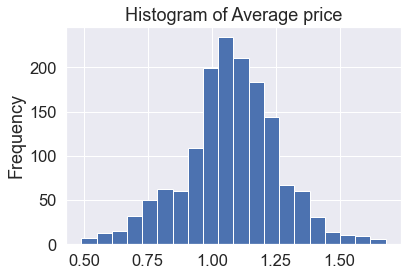

In [23]:
df['AveragePrice'].plot.hist(bins=20)
plt.title("Histogram of Average price")
plt.show()

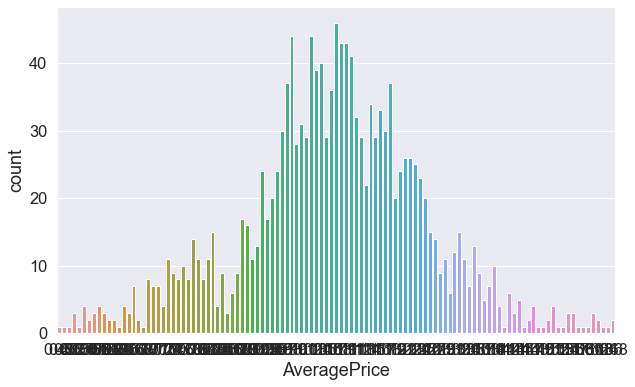

In [24]:
plt.figure(figsize=(10,6))
sn.countplot(df['AveragePrice'])
plt.show()

BIVARIATE ANALYSIS

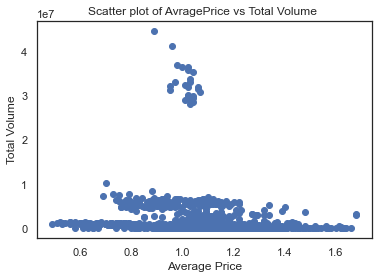

In [27]:
sn.set(style='white')
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.title("Scatter plot of AvragePrice vs Total Volume ")
plt.show()

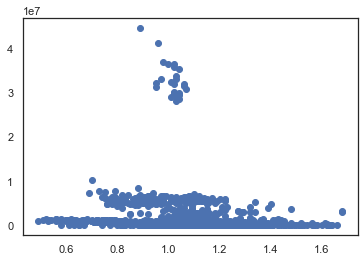

In [29]:
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.show()

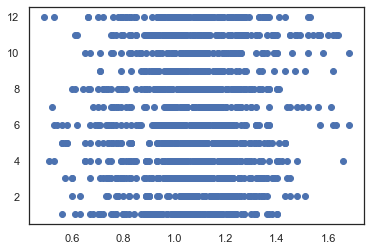

In [31]:
plt.scatter(df['AveragePrice'],df['Month'])
plt.show()

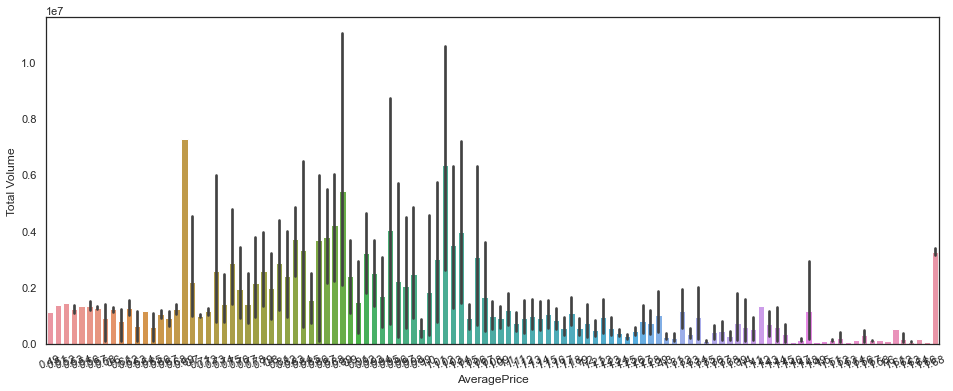

In [32]:
plt.figure(figsize=(16,6))
sn.barplot(x='AveragePrice',y='Total Volume',data=df)
plt.xticks(rotation=20)
plt.show()

# Plotting  Outliers

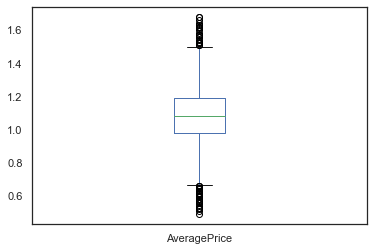

In [33]:
df['AveragePrice'].plot.box()
plt.show()

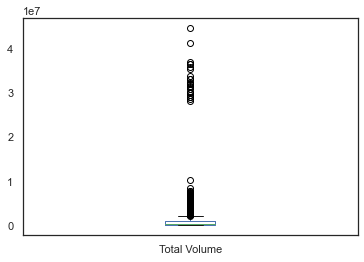

In [34]:
df['Total Volume'].plot.box()
plt.show()

In [37]:
df.shape

(1517, 16)

In [44]:
collist=df.columns.values
ncol=17
nrow=10

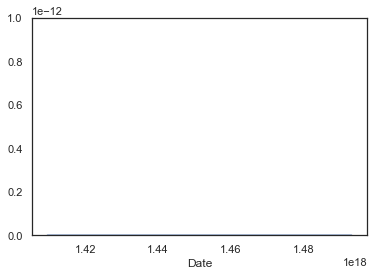

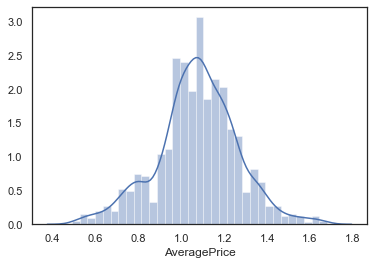

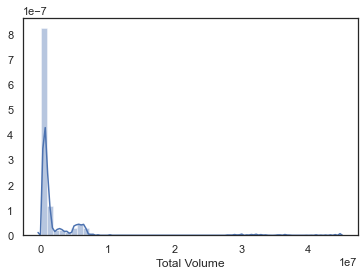

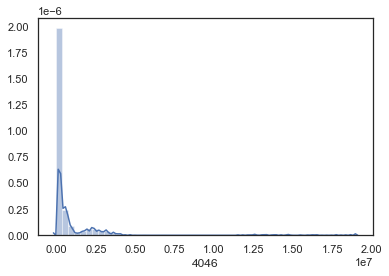

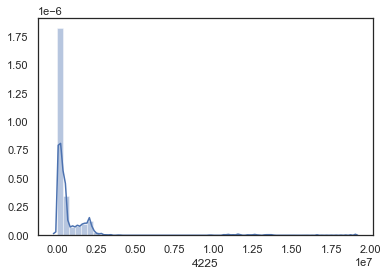

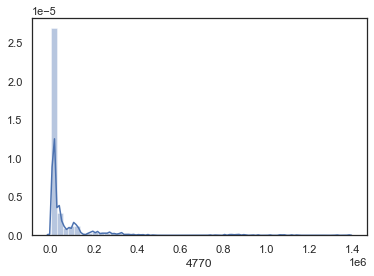

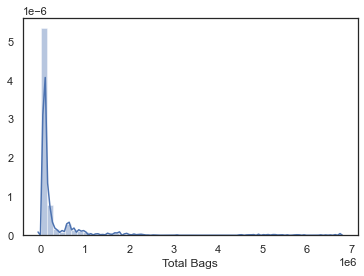

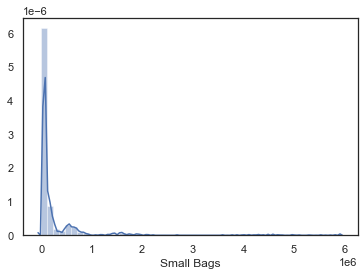

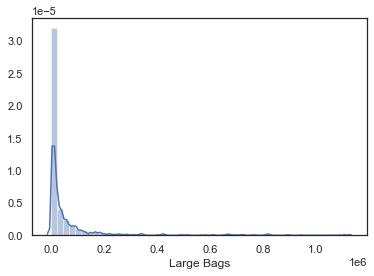

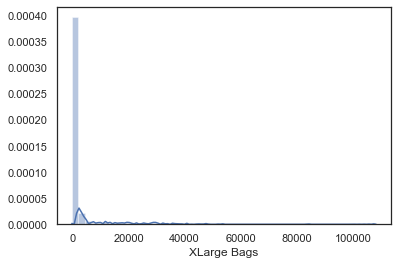

ValueError: could not convert string to float: 'conventional'

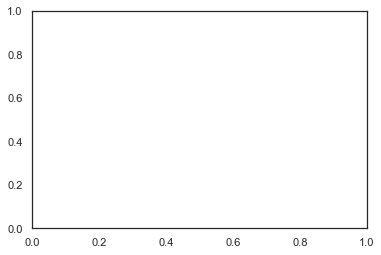

In [45]:
for i in df.columns:
    sn.distplot(df[i])
    plt.show()

In [46]:
#Checking skewness of data
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

# MODEL SELECTION AND PREDICTION

 lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.

In [68]:
df['region'].nunique()

51

In [69]:
df['type'].nunique()

1

In [70]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [71]:

df_final.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [72]:
df_final.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,9,10
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,2,10
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25
1516,14,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,2016,9,18


In [73]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [86]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.00047171052631694345
Mean Squared Error: 4.508289473684149e-06
Root Mean Squared Error: 0.0021232732922740185


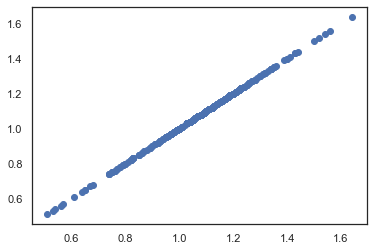

In [76]:
plt.scatter(x=y_test,y=pred)
plt.show()

In [77]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

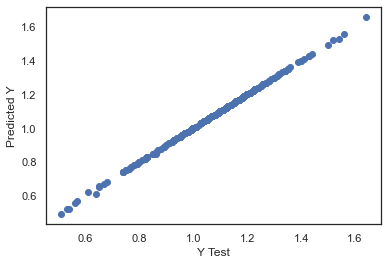

In [78]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.00047171052631694345
Mean Squared Error: 4.508289473684149e-06
Root Mean Squared Error: 0.0021232732922740185


In [80]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.00047171052631694345
MSE: 4.508289473684149e-06
RMSE: 0.0021232732922740185


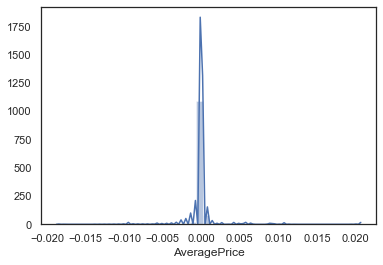

In [83]:
sn.distplot((y_test-pred),bins=50)
plt.show()

,Y Test,Pred
724,1.18,1.18
812,1.25,1.25
1466,1.08,1.08
1469,1.07,1.07
51,1.22,1.22


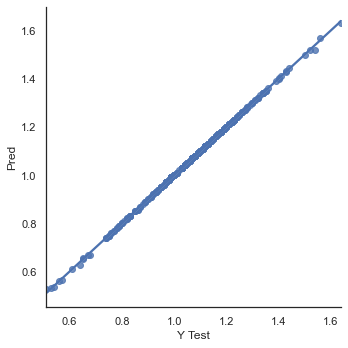

In [85]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sn.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

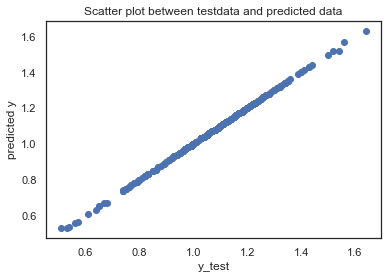

In [89]:
#Plotting scatter plot between test data and predicted data for Ada Boost
plt.scatter(y_test,pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title("Scatter plot between testdata and predicted data")
plt.show()